## Loading dependencies and data

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from scipy.stats import pearsonr
import statsmodels.api as sm

# Load the dataset
file = '../new-data/everything_merged_dataset_no_NULL_violent&sexual.csv'
data = pd.read_csv(file)

## Visualize data
Some visualization of data before analyses

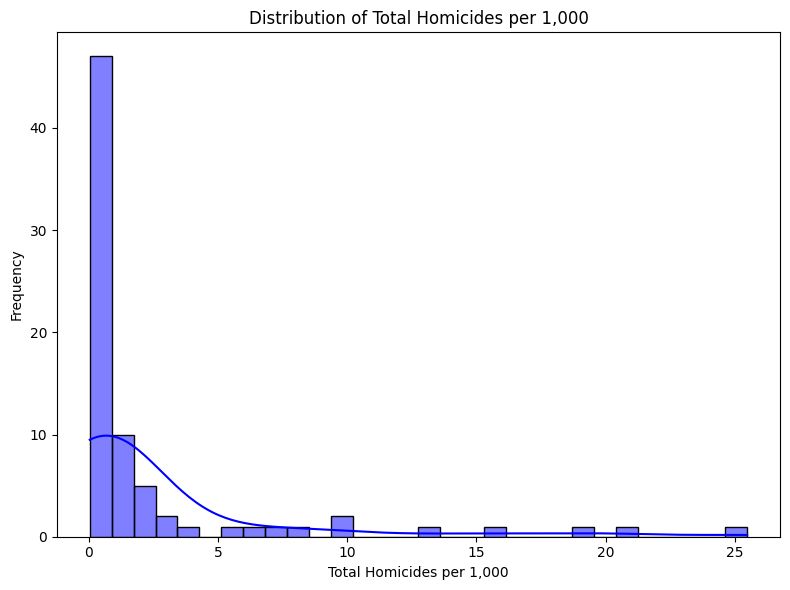

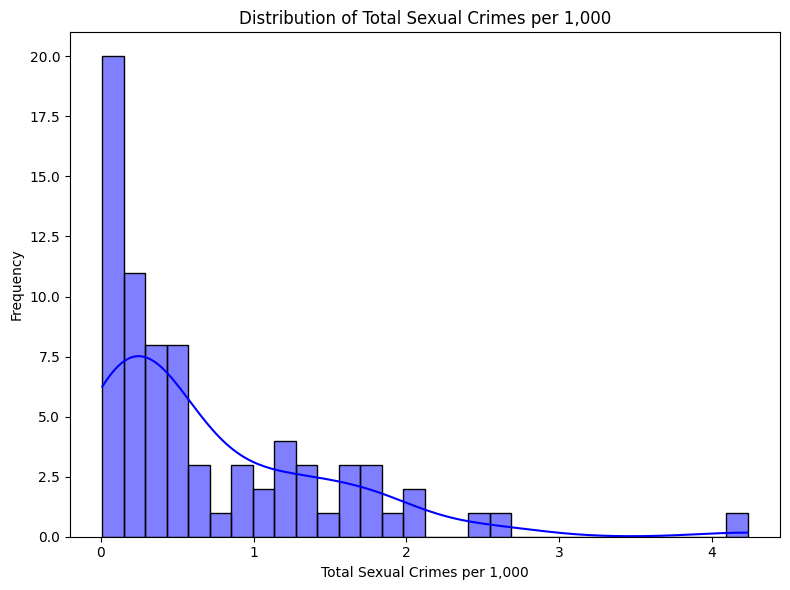

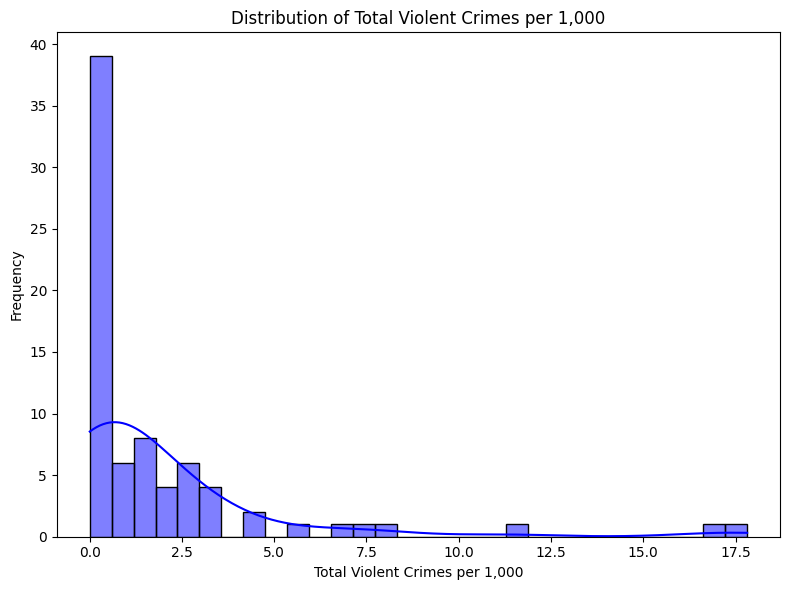

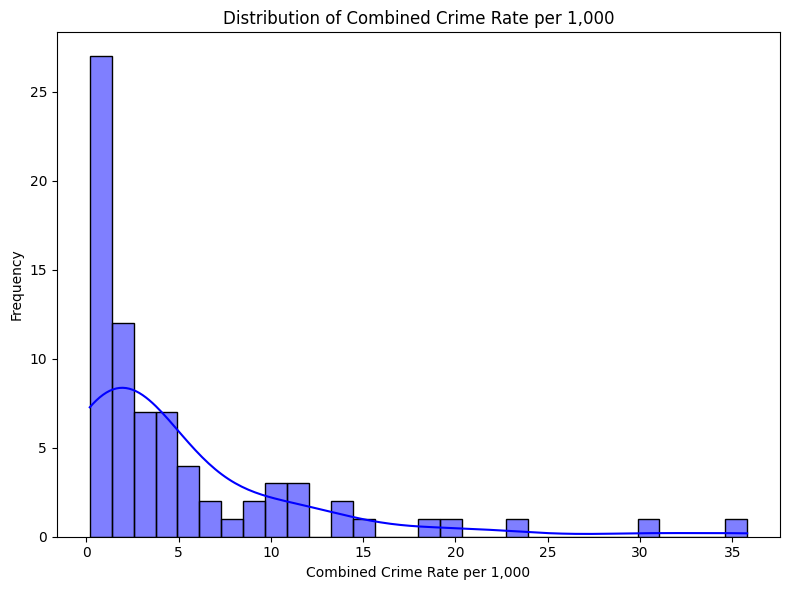

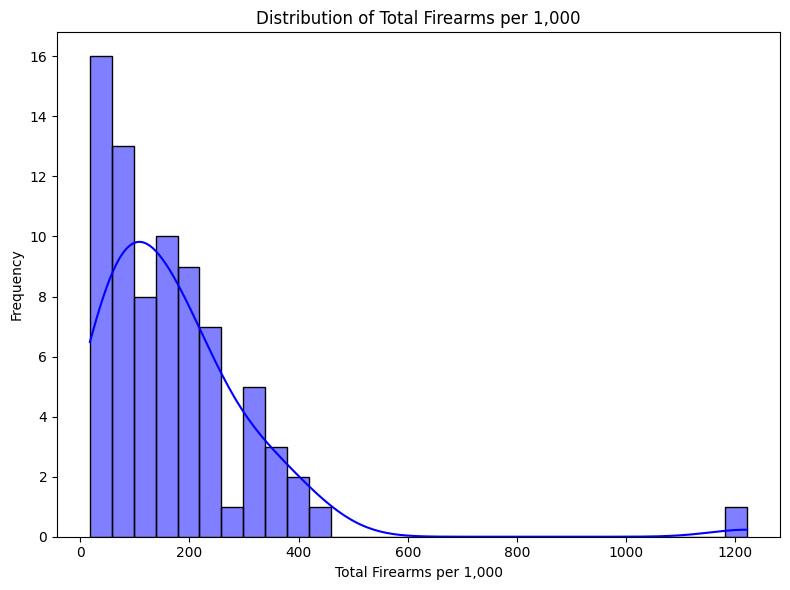

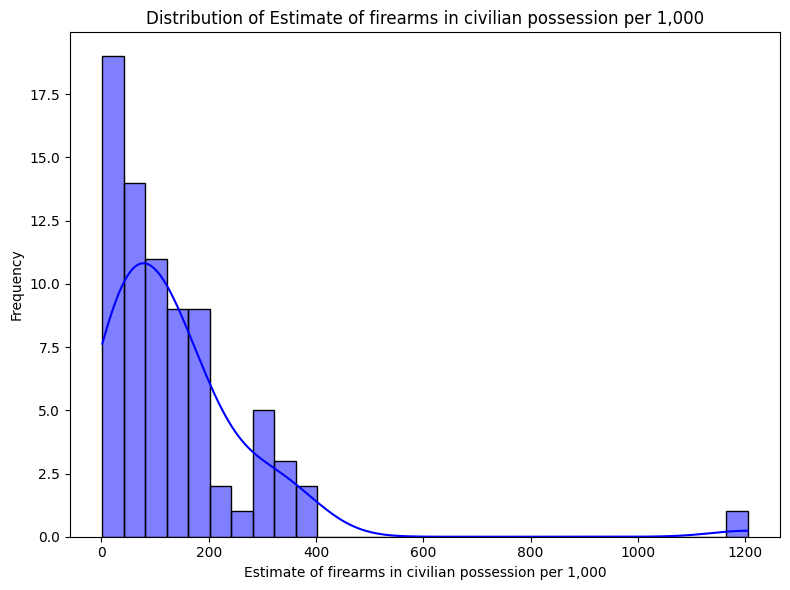

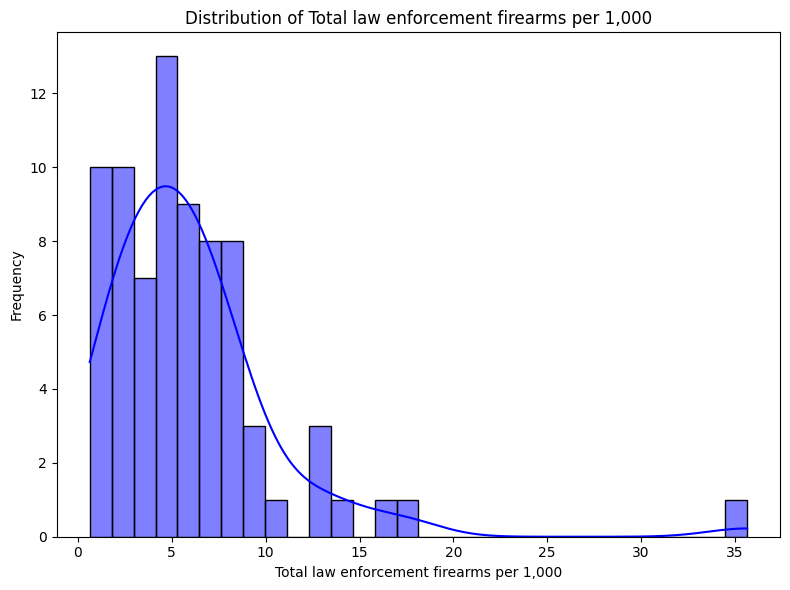

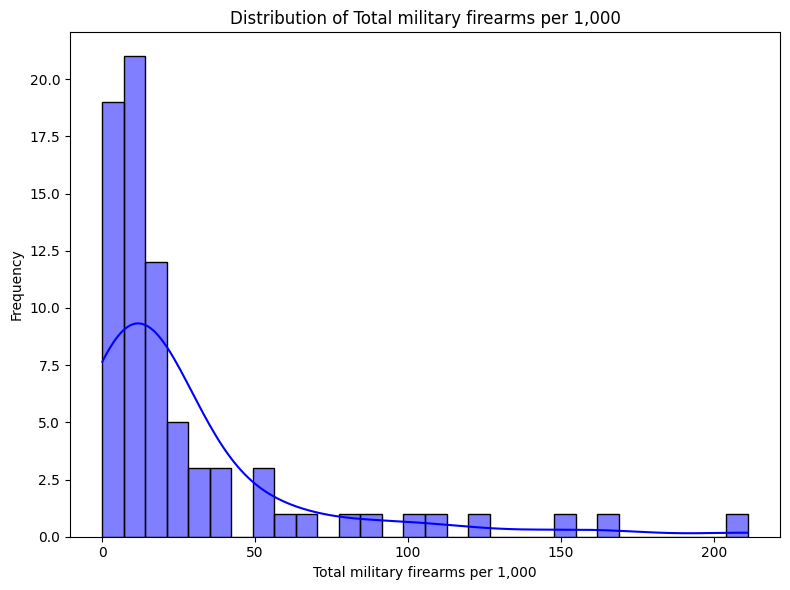

In [4]:
# We use the columns with the per 1000 data
columns_per_1000 = [
    "Total Homicides per 1,000",
    "Total Sexual Crimes per 1,000",
    "Total Violent Crimes per 1,000",
    "Combined Crime Rate per 1,000",
    "Total Firearms per 1,000",
    "Estimate of firearms in civilian possession per 1,000",
    "Total law enforcement firearms per 1,000",
    "Total military firearms per 1,000"
]

# And now we create histograms to visualize distribution of data
for column in columns_per_1000:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[column], bins=30, kde=True, color='blue')
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

<Figure size 2500x2000 with 0 Axes>

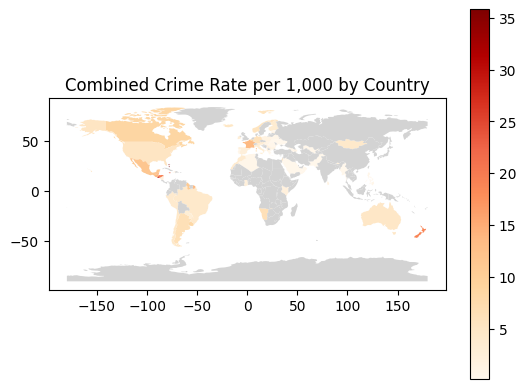

<Figure size 2500x2000 with 0 Axes>

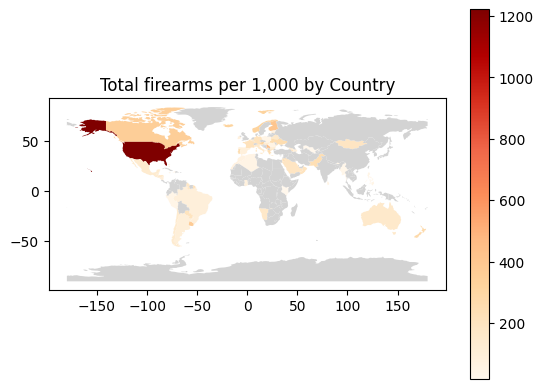

In [7]:
# Create world maps
file_path = "geo/ne_110m_admin_0_countries.shx" # world map data
world = gpd.read_file(file_path)
world = world.rename(columns={"NAME": "Country"})

# Merge data with world map
map_data = world.merge(data, on="Country", how="left")

# Plot Combined Crime Rate per 1,000
plt.figure(figsize=(25, 20))
map_data.plot(
    column="Combined Crime Rate per 1,000",
    cmap="OrRd",
    legend=True,
    missing_kwds={"color": "lightgrey", "label": "No data"},
)
plt.title("Combined Crime Rate per 1,000 by Country")
plt.show()

# Plot Total firearms per 1,000 by Country
plt.figure(figsize=(25, 20))
map_data.plot(
    column="Total Firearms per 1,000",
    cmap="OrRd",
    legend=True,
    missing_kwds={"color": "lightgrey", "label": "No data"},
)
plt.title("Total firearms per 1,000 by Country")
plt.show()

## Analyses of RQs
This is a start I guess

1. What is the general relationship between total sum of weapons for each type of crime seperated and also all types of crime combined  
2. group countries with similar gun stats together and check how their distributions compare  
3. check if GDP could be a confounding variable (AKA, check relationship between GDP and crime stats)  
4. Check if the presence of weapons in civilian hands changes stuff (check whether that could be a confounding variable too)  

As for question 2:
- 3 that contain the % of type of firearm possesion
- one that contains the distribution
- column "firearm group" which is a way to group countries together that have a similar distribution, basically each country gets assigned a group number

I printed the data so you guys can see  
It's not done yet but we can work with it maybe

### **First off - grouping countries**:
**I suggest that we group countries in 4 categories based on the total number of weapons per 1000 ppl (Low, Medium-Low, Medium-High, High). This way, we can have roughly equally-sized groups and will have variability withing the groups in terms of proportion of weapon ownership (some will have bigger proportion of civilian, military, or law enforcement), where the dominant ownership type will be recorded in a column. The current method for creating the groups is more precise in terms of having countries with similar total weapons in the same group, but we also have many more groups, some of them having only 2 members, which will make analysis more difficult.**

In [23]:
data["Total Firearms Group"] = pd.qcut(
    data["Total Firearms per 1,000"], q=4, labels=["Low", "Medium-Low", "Medium-High", "High"]
)

data["Civilian Proportion"] = (
    data["Estimate of firearms in civilian possession per 1,000"] / data["Total Firearms per 1,000"]
) * 100
data["Military Proportion"] = (
    data["Total military firearms per 1,000"] / data["Total Firearms per 1,000"]
) * 100
data["Law Enforcement Proportion"] = (
    data["Total law enforcement firearms per 1,000"] / data["Total Firearms per 1,000"]
) * 100

data.head(10)

,ISO,Country,Continent,Subregion,Year,Population,Estimate of firearms in civilian possession,Total law enforcement firearms,Total military firearms,"Estimate of firearms in civilian possession per 1,000",...,Country GDP,"Country GDP per 1,000","Combined Crime Rate per 1,000","Total Firearms per 1,000",Total Firearms Group,Civilian Proportion,Military Proportion,Law Enforcement Proportion,Dominant Ownership,Firearms Group
0,ALB,Albania,Europe,Southern Europe,2018,2911000.0,350000,19000,21750.0,120.233597,...,1.537951e+10,5.283239e+06,2.591206,134.232223,Medium-Low,89.571337,5.566219,4.862444,Civilian,Medium-Low
1,DZA,Algeria,Africa,Northern Africa,2018,41064000.0,877000,363000,637720.0,21.356906,...,1.945540e+11,4.737824e+06,0.726938,45.726671,Low,46.705579,33.962465,19.331956,Civilian,Low
2,ATG,Antigua and Barbuda,Americas,Latin America and the Caribbean,2018,94000.0,5000,800,438.0,53.191489,...,1.661530e+09,1.767585e+07,10.531915,66.361702,Low,80.153895,7.021481,12.824623,Civilian,Low
3,ARG,Argentina,Americas,Latin America and the Caribbean,2018,44272000.0,3256000,391000,679770.0,73.545356,...,5.248200e+11,1.185445e+07,6.528506,97.731523,Medium-Low,75.252440,15.710796,9.036764,Civilian,Medium-Low
4,ARM,Armenia,Asia,Western Asia,2018,3032000.0,186000,18000,509240.0,61.345646,...,1.245794e+10,4.108819e+06,0.545185,235.237467,High,26.078178,71.398127,2.523695,Military,High
5,AUS,Australia,Oceania,Australia and New Zealand,2018,24642000.0,3573000,69000,214520.0,144.996348,...,1.427810e+12,5.794213e+07,4.879109,156.501907,Medium-High,92.648294,5.562528,1.789178,Civilian,Medium-High
6,AUT,Austria,Europe,Western Europe,2018,8592000.0,2577000,37900,240880.0,299.930168,...,4.525820e+11,5.267481e+07,3.402817,332.376629,High,90.238044,8.434823,1.327133,Civilian,High
7,AZE,Azerbaijan,Asia,Western Asia,2018,9974000.0,362000,18000,537920.0,36.294365,...,4.711247e+10,4.723528e+06,1.043112,92.031281,Medium-Low,39.436988,58.602057,1.960955,Military,Medium-Low
8,BHS,Bahamas,Americas,Latin America and the Caribbean,2018,397000.0,74000,5000,2470.0,186.397985,...,1.261580e+10,3.177783e+07,35.798489,205.214106,Medium-High,90.830981,3.031791,6.137228,Civilian,Medium-High
9,BRB,Barbados,Americas,Latin America and the Caribbean,2018,286000.0,10000,2000,1675.0,34.965035,...,5.629916e+09,1.968502e+07,10.548951,47.814685,Low,73.126143,12.248629,14.625229,Civilian,Low


Plot to get an idea for each group how the weapons are roughly distributed

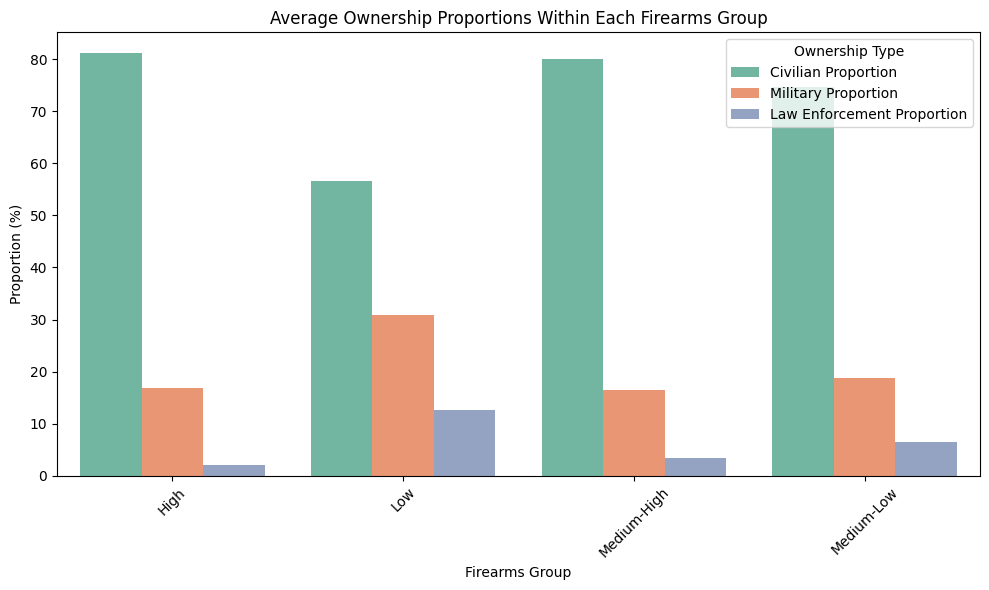

In [63]:
# Compute mean crime rates by firearm group & ownership proportions
crime_means_within_group = data.groupby("Firearms Group")[
    ["Civilian Proportion", "Military Proportion", "Law Enforcement Proportion",
     "Total Homicides per 1,000", "Total Sexual Crimes per 1,000", 
     "Total Violent Crimes per 1,000", "Combined Crime Rate per 1,000"]
].mean().reset_index()

# Plot bar chart for ownership proportions
plt.figure(figsize=(10, 6))
ownership_melted = crime_means_within_group.melt(id_vars="Firearms Group", value_vars=["Civilian Proportion", "Military Proportion", "Law Enforcement Proportion"])
sns.barplot(data=ownership_melted, x="Firearms Group", y="value", hue="variable", palette="Set2")

plt.title("Average Ownership Proportions Within Each Firearms Group")
plt.xlabel("Firearms Group")
plt.ylabel("Proportion (%)")
plt.legend(title="Ownership Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Key Takeaways:**
- In countries with high total firearm ownership, most firearms are civilian-owned.
- In low total firearm countries, the share of military firearms is higher.
- Law enforcement firearms are consistently the least significant contributor.

# **Analysis for Question 1. What is the general relationship between the presence of firearms per country (total N firearms per 1000 citizens) and the amount of homocides, violent and sexual crimes?**
### Is there a statistically significant relationship between the total number of weapons per 1000 ppl and the types of crime (investigate for each crime separately and in total)

Correlations between weapons and crime types:
{'Total Homicides per 1,000': np.float64(-0.03792166872967036), 'Total Sexual Crimes per 1,000': np.float64(0.13552659215031004), 'Total Violent Crimes per 1,000': np.float64(0.10587926076517708), 'Combined Crime Rate per 1,000': np.float64(0.03938638828219131)}


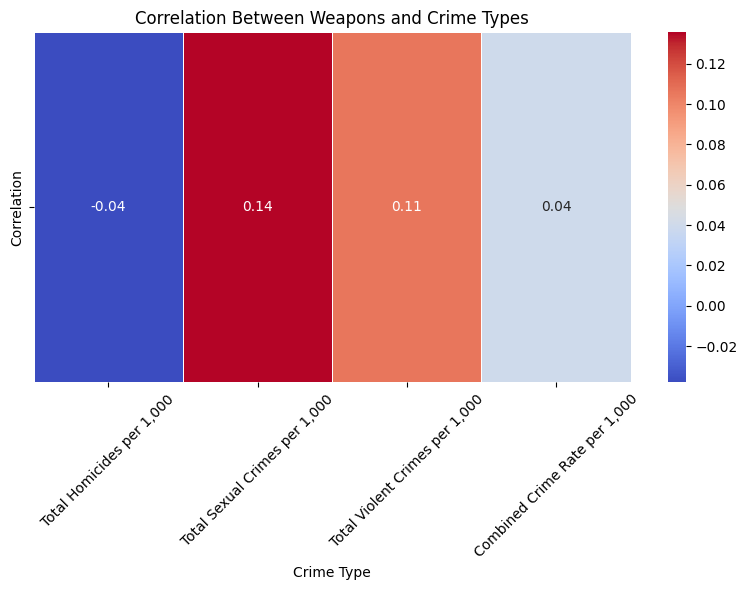

In [24]:
# General Relationship Between Weapons and Crime Types
crime_columns = ["Total Homicides per 1,000", "Total Sexual Crimes per 1,000", "Total Violent Crimes per 1,000", "Combined Crime Rate per 1,000"]
weapon_column = "Total Firearms per 1,000"

# Correlations between weapons and crime types
correlations = {}
for crime in crime_columns:
    correlation, _ = pearsonr(data[weapon_column], data[crime])
    correlations[crime] = correlation

print("Correlations between weapons and crime types:")
print(correlations)

# Create heatmap
correlation_data = pd.DataFrame(list(correlations.items()), columns=["Crime Type", "Correlation"])
plt.figure(figsize=(8, 6))  
sns.heatmap(
    correlation_data.set_index("Crime Type").T,
    annot=True,
    cmap="coolwarm",
    cbar=True,
    linewidths=0.5,
    fmt=".2f"
)
plt.title("Correlation Between Weapons and Crime Types")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We can add such scatterplots to see the relationship between total weapons vs each crime type for the countries in different groups. I'll print one just to see how it goes, if we decide to use them, uncomment the code for the rest.

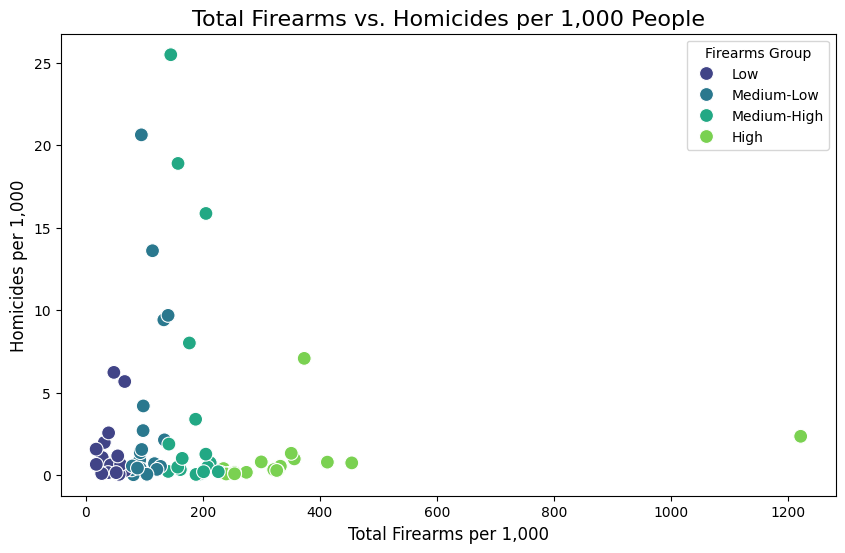

'# Repeat for Violent Crimes\nplt.figure(figsize=(10, 6))\nsns.scatterplot(\n    x="Total Firearms per 1,000", \n    y="Total Violent Crimes per 1,000", \n    data=data, \n    hue="Total Firearms Group", \n    palette="coolwarm", \n    s=100\n)\nplt.title("Total Firearms vs. Violent Crimes per 1,000 People", fontsize=16)\nplt.xlabel("Total Firearms per 1,000", fontsize=12)\nplt.ylabel("Violent Crimes per 1,000", fontsize=12)\nplt.legend(title="Firearms Group")\nplt.show()\n\n# Repeat for Sexual Crimes\nplt.figure(figsize=(10, 6))\nsns.scatterplot(\n    x="Total Firearms per 1,000", \n    y="Total Sexual Crimes per 1,000", \n    data=data, \n    hue="Total Firearms Group", \n    palette="plasma", \n    s=100\n)\nplt.title("Total Firearms vs. Sexual Crimes per 1,000 People", fontsize=16)\nplt.xlabel("Total Firearms per 1,000", fontsize=12)\nplt.ylabel("Sexual Crimes per 1,000", fontsize=12)\nplt.legend(title="Firearms Group")\nplt.show()\n\n# Repeat for Total Crimes\nplt.figure(figsize=(

In [25]:
# Scatterplot: Total firearms vs. Homicides
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="Total Firearms per 1,000", 
    y="Total Homicides per 1,000", 
    data=data, 
    hue="Total Firearms Group", 
    palette="viridis", 
    s=100
)
plt.title("Total Firearms vs. Homicides per 1,000 People", fontsize=16)
plt.xlabel("Total Firearms per 1,000", fontsize=12)
plt.ylabel("Homicides per 1,000", fontsize=12)
plt.legend(title="Firearms Group")
plt.show()

'''# Repeat for Violent Crimes
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="Total Firearms per 1,000", 
    y="Total Violent Crimes per 1,000", 
    data=data, 
    hue="Total Firearms Group", 
    palette="coolwarm", 
    s=100
)
plt.title("Total Firearms vs. Violent Crimes per 1,000 People", fontsize=16)
plt.xlabel("Total Firearms per 1,000", fontsize=12)
plt.ylabel("Violent Crimes per 1,000", fontsize=12)
plt.legend(title="Firearms Group")
plt.show()

# Repeat for Sexual Crimes
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="Total Firearms per 1,000", 
    y="Total Sexual Crimes per 1,000", 
    data=data, 
    hue="Total Firearms Group", 
    palette="plasma", 
    s=100
)
plt.title("Total Firearms vs. Sexual Crimes per 1,000 People", fontsize=16)
plt.xlabel("Total Firearms per 1,000", fontsize=12)
plt.ylabel("Sexual Crimes per 1,000", fontsize=12)
plt.legend(title="Firearms Group")
plt.show()

# Repeat for Total Crimes
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="Total Firearms per 1,000", 
    y="Combined Crime Rate per 1,000", 
    data=data, 
    hue="Total Firearms Group", 
    palette="plasma", 
    s=100
)
plt.title("Total Firearms vs. Combined Crimes per 1,000 People", fontsize=16)
plt.xlabel("Total Firearms per 1,000", fontsize=12)
plt.ylabel("Combined Crimes per 1,000", fontsize=12)
plt.legend(title="Firearms Group")
plt.show()'''

Regression analysis for total number of weapons vs different crime types. GDP is included too as a confounding variable

In [26]:
# Homicides regression
X_homicides = data[["Total Firearms per 1,000", "Country GDP per 1,000"]] # GDP added as a confounding var
y_homicides = data["Total Homicides per 1,000"]
X_homicides = sm.add_constant(X_homicides)
model_homicides = sm.OLS(y_homicides, X_homicides).fit()

print("Regression for Homicides:\n")
print(model_homicides.summary())

# Repeat for Violent Crimes
X_violent = data[["Total Firearms per 1,000", "Country GDP per 1,000"]]
y_violent = data["Total Violent Crimes per 1,000"]
X_violent = sm.add_constant(X_violent)
model_violent = sm.OLS(y_violent, X_violent).fit()

print("\nRegression for Violent Crimes:\n")
print(model_violent.summary())

# Repeat for Sexual Crimes
X_sexual = data[["Total Firearms per 1,000", "Country GDP per 1,000"]]
y_sexual = data["Total Sexual Crimes per 1,000"]
X_sexual = sm.add_constant(X_sexual)
model_sexual = sm.OLS(y_sexual, X_sexual).fit()

print("\nRegression for Sexual Crimes:\n")
print(model_sexual.summary())

# Repeat for Combined Crimes
X_sexual = data[["Total Firearms per 1,000", "Country GDP per 1,000"]]
y_sexual = data["Combined Crime Rate per 1,000"]
X_sexual = sm.add_constant(X_sexual)
model_sexual = sm.OLS(y_sexual, X_sexual).fit()

print("\nRegression for Combined Crimes:\n")
print(model_sexual.summary())

Regression for Homicides:

                                OLS Regression Results                               
Dep. Variable:     Total Homicides per 1,000   R-squared:                       0.041
Model:                                   OLS   Adj. R-squared:                  0.015
Method:                        Least Squares   F-statistic:                     1.561
Date:                       Tue, 28 Jan 2025   Prob (F-statistic):              0.217
Time:                               13:14:51   Log-Likelihood:                -227.44
No. Observations:                         76   AIC:                             460.9
Df Residuals:                             73   BIC:                             467.9
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------

#### **Overview of results:**
- **Total Firearms per 1,000**: 
  - **Not statistically significant** for any of the three types of crime (p > 0.05 in all models).
  - This suggests that the total number of firearms alone does not explain variations in crime rates across countries.
  
- **GDP**:
  - **Significant for Violent and Sexual Crimes**:
    - Positive relationship with violent crimes (p = 0.008).
    - Strong positive relationship with sexual crimes (p < 0.001).
  - Not significant for homicides.

# **Analysis for Question 2. Compare countries with similar total weapon numbers per 1000 citizens but different distributions (e.g., more civilian vs. military-held weapons vs. law enforcement) to investigate differences in homicide and sexual assault rates. How do different proportions of the weapon ownership types affect crime rates?**

**For each group, what is the correlation of the different distributions with crime:**

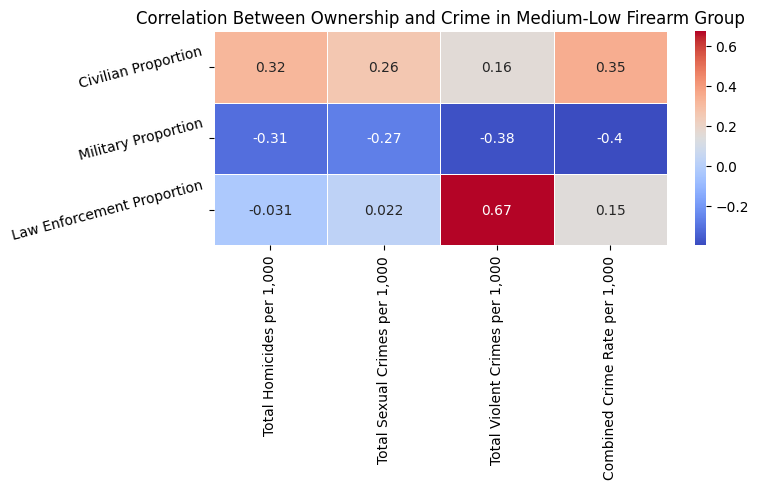

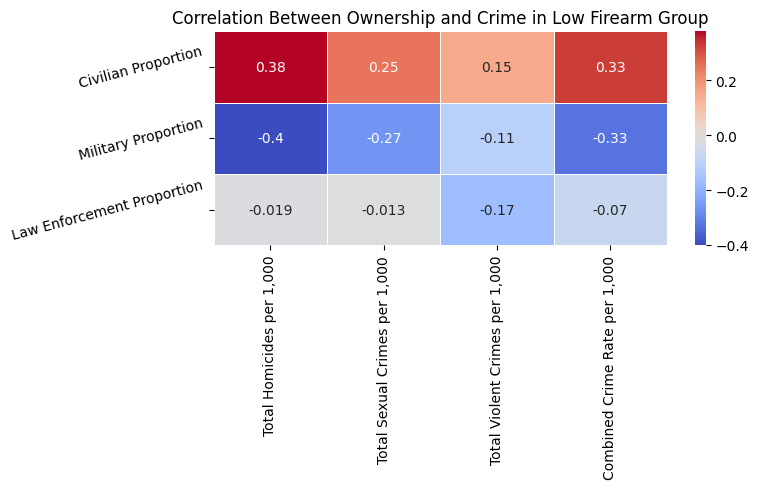

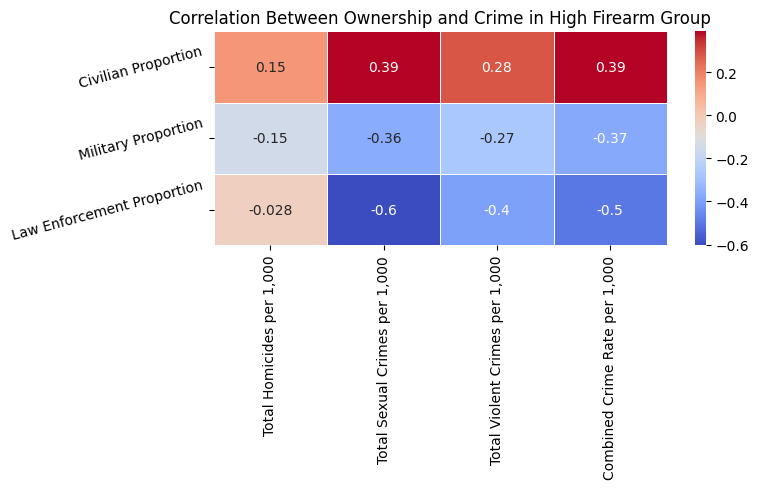

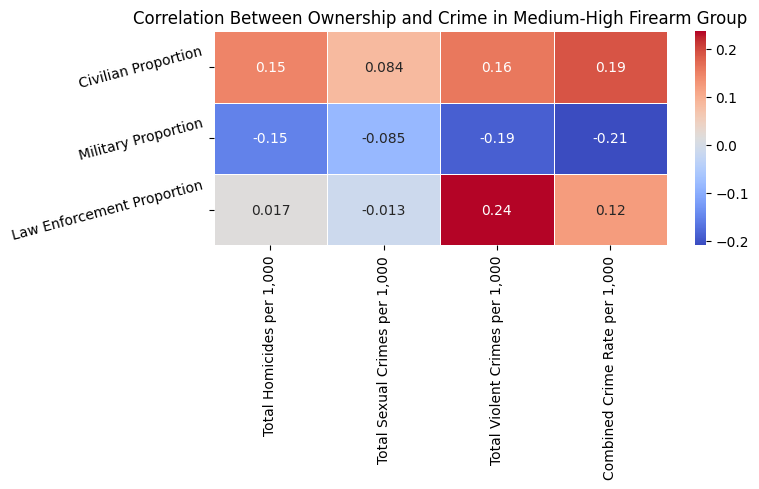

In [ ]:
within_group_correlation_dict = {}

for group in data["Firearms Group"].unique():
    subset = data[data["Firearms Group"] == group]  # Filter data per group
    
    # Compute correlation matrix
    correlation_matrix = subset[["Civilian Proportion", "Military Proportion", "Law Enforcement Proportion",
                                 "Total Homicides per 1,000", "Total Sexual Crimes per 1,000", 
                                 "Total Violent Crimes per 1,000", "Combined Crime Rate per 1,000"]].corr()

    # Extract only ownership vs. crime correlations
    ownership_crime_correlation = correlation_matrix.loc[
        ["Civilian Proportion", "Military Proportion", "Law Enforcement Proportion"], 
        ["Total Homicides per 1,000", "Total Sexual Crimes per 1,000", 
         "Total Violent Crimes per 1,000", "Combined Crime Rate per 1,000"]
    ]
    
    within_group_correlation_dict[group] = ownership_crime_correlation

    # heatmap
    plt.figure(figsize=(8, 5))
    sns.heatmap(ownership_crime_correlation, annot=True, cmap="coolwarm", linewidths=0.5)
    plt.title(f"Correlation Between Ownership and Crime in {group} Firearm Group")
    plt.xticks(rotation=90)
    plt.yticks(rotation=15)
    plt.tight_layout()
    plt.show()

In [ ]:
regression_results = {}

# Run a regression separately for each firearm group
for group in data["Firearms Group"].unique():
    subset = data[data["Firearms Group"] == group]  # Filter for each group
    X = subset[["Civilian Proportion", "Military Proportion", "Law Enforcement Proportion", "Country GDP per 1,000"]] # GDP added as a confound
    X = sm.add_constant(X)
    y = subset["Total Homicides per 1,000"]
    model = sm.OLS(y, X).fit()
    regression_results[group] = model.summary()
    
for group, result in regression_results.items():
    print(f"\n Regression Results for {group} Firearm Group")
    print(result)


 Regression Results for Medium-Low Firearm Group
                                OLS Regression Results                               
Dep. Variable:     Total Homicides per 1,000   R-squared:                       0.153
Model:                                   OLS   Adj. R-squared:                 -0.016
Method:                        Least Squares   F-statistic:                    0.9041
Date:                       Tue, 28 Jan 2025   Prob (F-statistic):              0.462
Time:                               14:28:35   Log-Likelihood:                -57.758
No. Observations:                         19   AIC:                             123.5
Df Residuals:                             15   BIC:                             127.3
Df Model:                                  3                                         
Covariance Type:                   nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.

/opt/miniconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=19 observations were given.
  return hypotest_fun_in(*args, **kwds)
/opt/miniconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=19 observations were given.
  return hypotest_fun_in(*args, **kwds)
/opt/miniconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=19 observations were given.
  return hypotest_fun_in(*args, **kwds)
/opt/miniconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=19 observations were given.
  return hypotest_fun_in(*args, **kwds)


Question 3.

Correlations between GDP and crime types:
{'Total Homicides per 1,000': np.float64(-0.049770658267863366), 'Total Sexual Crimes per 1,000': np.float64(-0.011361705261586866), 'Total Violent Crimes per 1,000': np.float64(0.08836990758036019), 'Combined Crime Rate per 1,000': np.float64(0.0052657886876248585)}


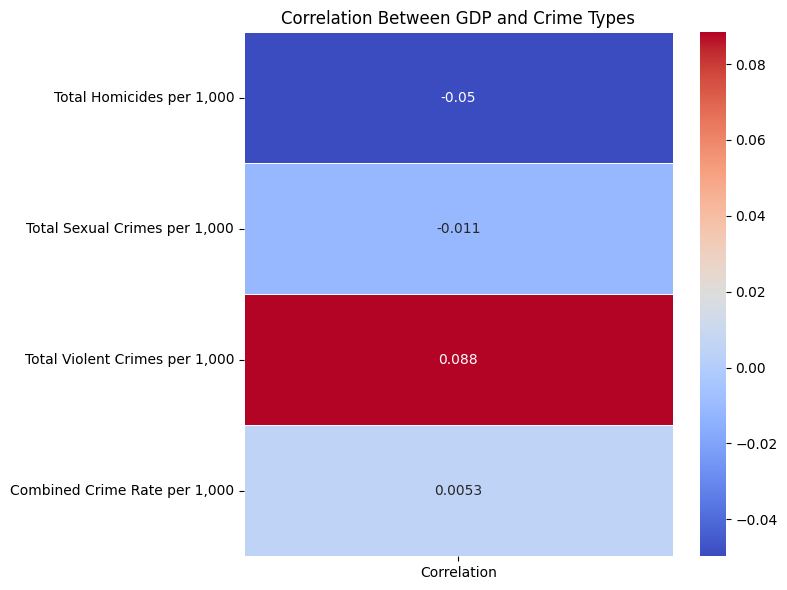

In [13]:
# GDP as a Confounding Variable
gdp_column = "Country GDP"

# Correlations between GDP and crime stats
gdp_crime_correlations = {}
for crime in crime_columns:
    correlation, _ = pearsonr(data[gdp_column], data[crime])
    gdp_crime_correlations[crime] = correlation

print("Correlations between GDP and crime types:")
print(gdp_crime_correlations)

# Create heatmap
correlation_df = pd.DataFrame.from_dict(gdp_crime_correlations, orient='index', columns=['Correlation'])
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_df,
    annot=True,
    cmap='coolwarm',
    cbar=True,
    linewidths=0.5
)
plt.title("Correlation Between GDP and Crime Types")
plt.tight_layout()
plt.show()

Question 4.

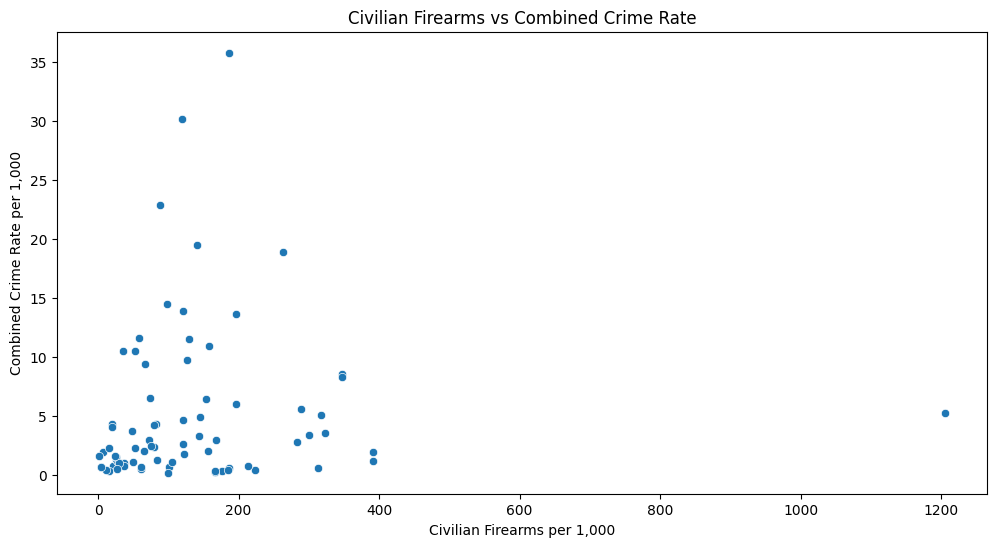

Correlation between civilian firearms and combined crime rate: 0.08879425288446355


In [176]:
# Impact of Civilian Gun Ownership
# Relationship between civilian firearms per 1,000 and crime rates
civ_gun_column = "Estimate of firearms in civilian possession per 1,000"

plt.figure(figsize=(12, 6))
sns.scatterplot(x=civ_gun_column, y='Combined Crime Rate per 1,000', data=data)
plt.title('Civilian Firearms vs Combined Crime Rate')
plt.xlabel('Civilian Firearms per 1,000')
plt.ylabel('Combined Crime Rate per 1,000')
plt.show()

# Correlation
civ_gun_correlation, _ = pearsonr(data[civ_gun_column], data['Combined Crime Rate per 1,000'])
print(f"Correlation between civilian firearms and combined crime rate: {civ_gun_correlation}")